# Plotly Tests
> This notebook is made for the purposes of testing visuals in plotly.

## Imports and suchExploration for Reported Assessment Results and Suppressed Assessment Information

In [2]:
import pandas as pd
import numpy as np
import plotly as plt
import plotly.express as px
import io
from plotly.subplots import make_subplots

In [3]:
# Import assessment data minus fully suppressed scores
assessments = pd.read_pickle('../data/school_based/assessments_clean.pkl')

# Import Suppressed outlier data
suppressed = pd.read_pickle ('../data/school_based/full_suppression.pkl')

## District and school information

### State-Wide District and School Counts 

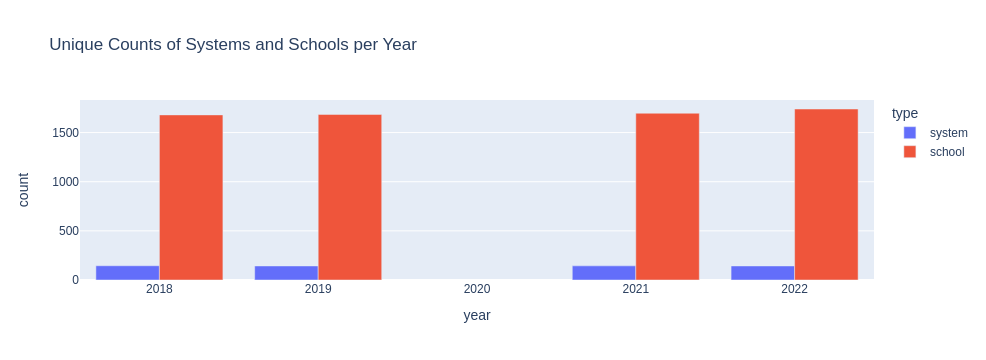

In [4]:
# Calculate the number of unique systems and schools in each year
unique_counts = assessments.groupby('year').agg({'system': pd.Series.nunique, 'school': pd.Series.nunique}).reset_index()

# Melt the DataFrame to get it in the right format for plotting
melted_counts = unique_counts.melt(id_vars='year', var_name='type', value_name='count')

# Create a bar chart with Plotly
fig = px.bar(melted_counts, x='year', y='count', color='type', barmode='group', title='Unique Counts of Systems and Schools per Year')

# Show the chart
fig.show()

### Proficiency By School Level And Subject 

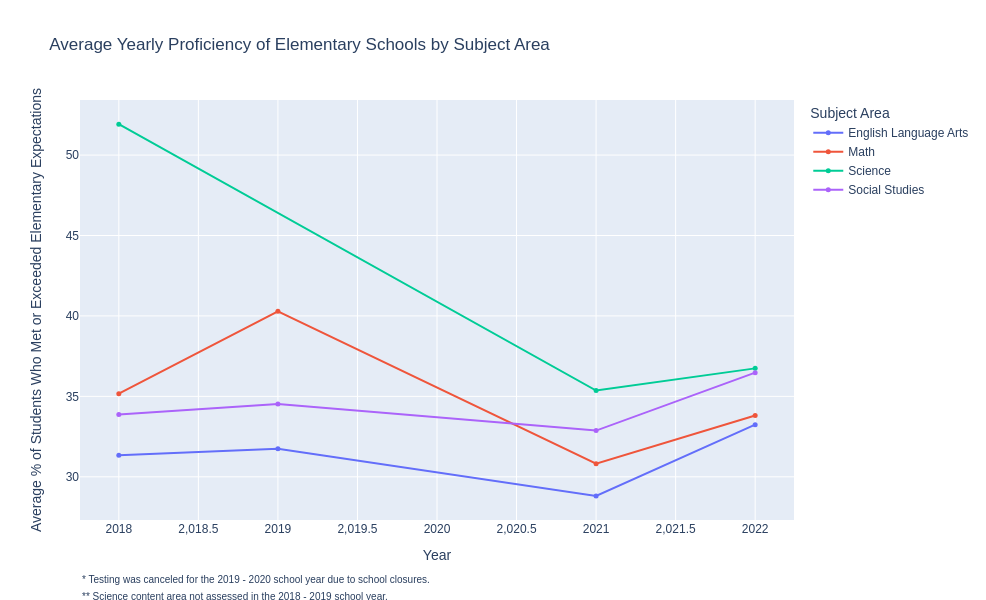

In [9]:
# Choose Your Level
lvl = 'Elementary' #('Elementary', Secondary', 'High', 'Other')

# Filter DataFrame for the chosen level
level_data = assessments[assessments['school_lvl'] == lvl]

# Calculate average pct_met_exceeded for each subject_area and year
average_data = level_data.groupby(['subject_area', 'year'])['pct_met_exceeded'].mean().reset_index()

# Create a line chart
fig = px.line(average_data, 
              x='year', 
              y='pct_met_exceeded', 
              color='subject_area',
              title=f'Average Yearly Proficiency of {lvl} Schools by Subject Area',
              height=600, 
              width=800)

# Update marker settings
fig.update_traces(mode='markers+lines', marker=dict(size=5))

# Update legends and axis labels
fig.update_layout(legend_title='Subject Area',
                  xaxis_title='Year',
                  yaxis_title=f'Average % of Students Who Met or Exceeded {lvl} Expectations')

# Add footnotes
footnote1_text = "* Testing was canceled for the 2019 - 2020 school year due to school closures."
fig.add_annotation(text=footnote1_text, xref="paper", yref="paper", x=0, y=-0.16, showarrow=False, align='right', font=dict(size=10))
footnote2_text = "** Science content area not assessed in the 2018 - 2019 school year."
fig.add_annotation(text=footnote2_text, xref="paper", yref="paper", x=0, y=-0.2, showarrow=False, align='right', font=dict(size=10))

# Show the plot
fig.show()


### Proficiency By School Level, Subject, and Student Group 

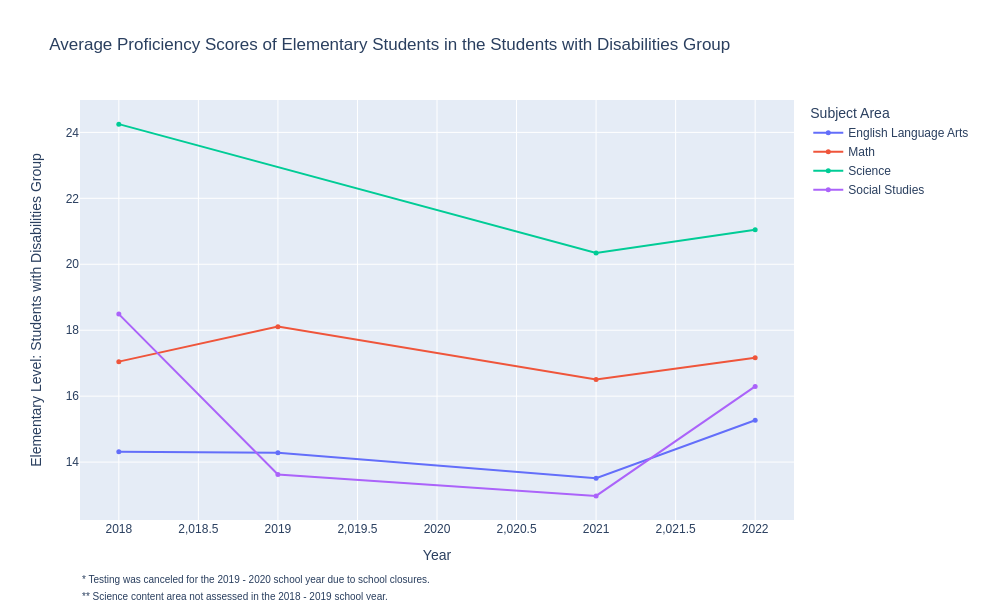

In [8]:
# Choose Your Level
lvl = 'Elementary'  # ('Elementary', 'Secondary', 'High', 'Other')

# Choose Your Student Group
grp = 'Students with Disabilities'  # Specify the desired student group

# Filter DataFrame for the chosen level and student group
filtered_data = assessments[(assessments['school_lvl'] == lvl) & (assessments['student_group'] == grp)]

# Calculate average pct_met_exceeded for each subject_area and year
average_data = filtered_data.groupby(['subject_area', 'year'])['pct_met_exceeded'].mean().reset_index()

# Create a line chart
fig = px.line(average_data, 
              x='year', 
              y='pct_met_exceeded', 
              color='subject_area',
              title=f'Average Proficiency Scores of {lvl} Students in the {grp} Group',
              height=600, 
              width=800)

# Update marker settings
fig.update_traces(mode='markers+lines', marker=dict(size=5))

# Disconnect lines from 2020
fig.update_traces(connectgaps=False)

# Update legends and axis labels
fig.update_layout(legend_title='Subject Area',
                  xaxis_title='Year',
                  yaxis_title=f'{lvl} Level: {grp} Group')

# Add footnotes
footnote1_text = "* Testing was canceled for the 2019 - 2020 school year due to school closures."
fig.add_annotation(text=footnote1_text, xref="paper", yref="paper", x=0, y=-0.16, showarrow=False, align='right', font=dict(size=10))
footnote2_text = "** Science content area not assessed in the 2018 - 2019 school year."
fig.add_annotation(text=footnote2_text, xref="paper", yref="paper", x=0, y=-0.2, showarrow=False, align='right', font=dict(size=10))

# Show the plot
fig.show()